In [1]:
import lightkurve

In [6]:
s2_file = lightkurve.search.open('./input/S02/tess-s0002-3-4_49.207_-58.524_25x25_astrocut.fits')
s3_file = lightkurve.search.open('./input/S03/tess-s0003-3-3_49.207_-58.524_25x25_astrocut.fits')
s4_file = lightkurve.search.open('./input/S04/tess-s0004-3-3_49.207_-58.524_25x25_astrocut.fits')
target_lc = s2_file.to_lightcurve().flatten()
target_lc = target_lc.append(s3_file.to_lightcurve().flatten())
target_lc = target_lc.append(s4_file.to_lightcurve().flatten())

target_lc = target_lc.remove_nans().remove_outliers()

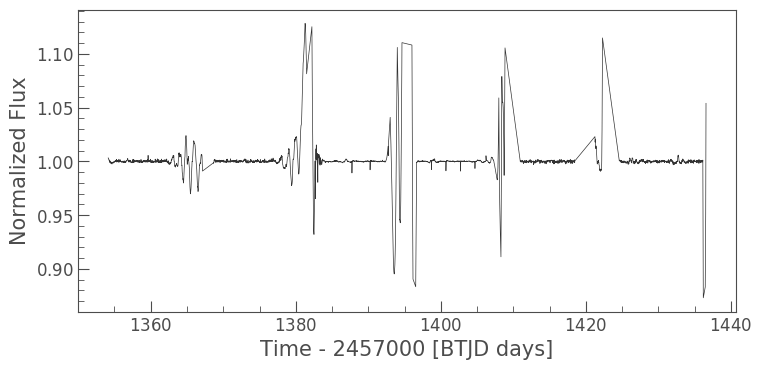

In [7]:
target_lc.plot()

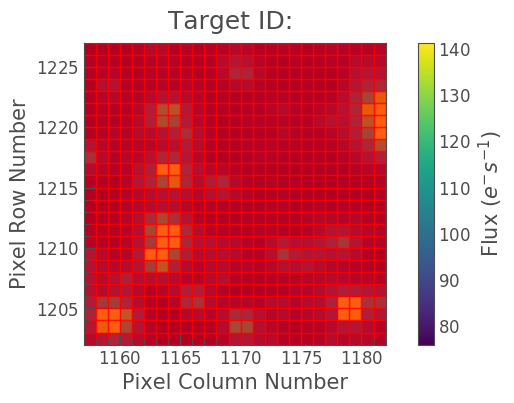

In [12]:
s2_file.plot(frame=100, aperture_mask=s2_file.pipeline_mask, mask_color='red')

In [13]:
import numpy as np

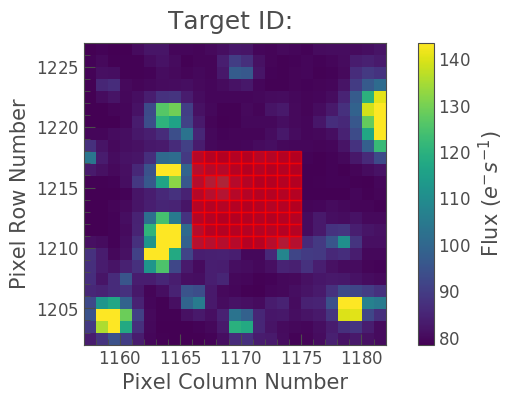

In [64]:
center_aperture = np.zeros(s2_file.shape[1:], dtype=np.int)
center_aperture[8:16,9:18] = 1
s2_file.plot(aperture_mask=center_aperture,mask_color='red')

In [68]:
center_lc = s2_file.to_lightcurve(aperture_mask=center_aperture.astype(bool)).flatten()
s2_lc = center_lc
s3_lc = (s3_file.to_lightcurve(aperture_mask=center_aperture.astype(bool)).flatten())
center_lc = center_lc.append(s3_lc)
s4_lc = (s4_file.to_lightcurve(aperture_mask=center_aperture.astype(bool)).flatten())
center_lc = center_lc.append(s4_lc)
center_lc.remove_nans().remove_outliers()

TessLightCurve(TICID: )

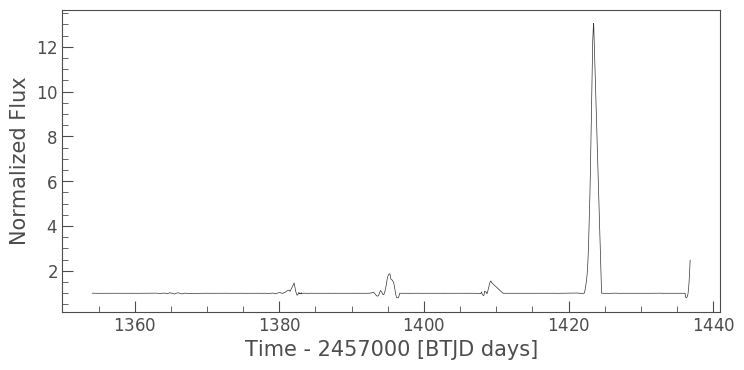

In [69]:
center_lc.plot()

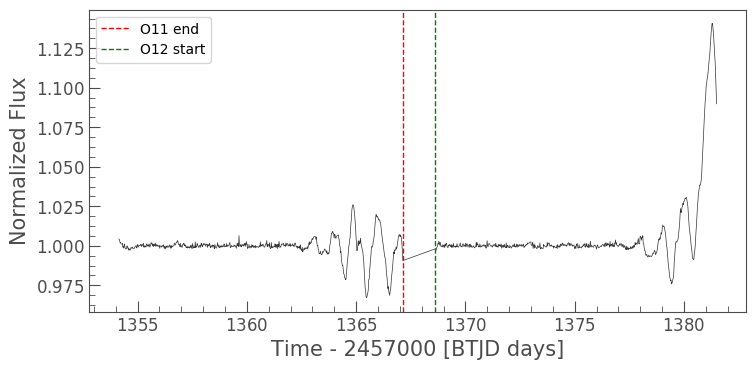

In [84]:
ax = s2_lc.plot()
ax.axvline(x=1367.15347, linestyle='--', linewidth=1, label='O11 end', color='red')
ax.axvline(x=1368.59406, linestyle='--', linewidth=1, label='O12 start', color='green')
ax.legend()

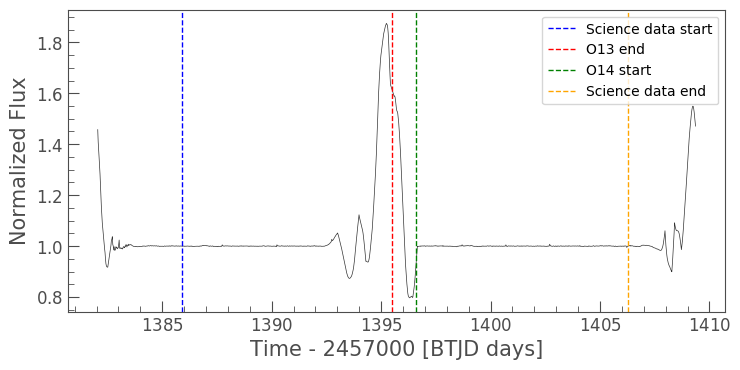

In [83]:
ax = s3_lc.plot()
ax.axvline(x=1385.89663, linestyle='--', linewidth=1, label='Science data start', color='blue')
ax.axvline(x=1395.47997, linestyle='--', linewidth=1, label='O13 end', color='red')
ax.axvline(x=1396.60497, linestyle='--', linewidth=1, label='O14 start', color='green')
ax.axvline(x=1406.29247, linestyle='--', linewidth=1, label='Science data end', color='orange')
ax.legend()

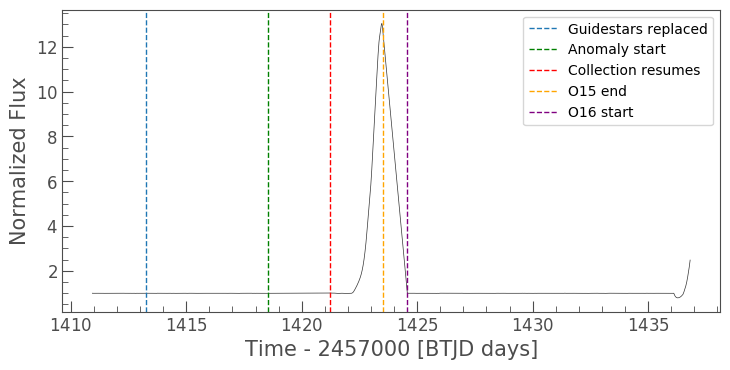

In [81]:
ax = s4_lc.plot()

ax.axvline(x=1413.26468, linestyle='--', linewidth=1, label='Guidestars replaced')
ax.axvline(x=1418.53691, linestyle='--', linewidth=1, label='Anomaly start', color='green')
ax.axvline(x=1421.21168, linestyle='--', linewidth=1, label='Collection resumes', color='red')
ax.axvline(x=1423.50890, linestyle='--', linewidth=1, label='O15 end', color='orange')
ax.axvline(x=1424.54897, linestyle='--', linewidth=1, label='O16 start', color='purple')
#ax.axvline(x=, linestyle='--', linewidth=1, label='', color='blue')
ax.legend()

From here: 
Since we're looking at an 'empty' little bit of sky here it seems like the right candidate for some pixel level lightcurve making and detrending. Probably should do a few things - 
1) There are a few stars in this area; we might have photometry for them already, so check! <-- nope, not S1 -_-
2) Make masks for the stars we can see here, and make some lightcurves for them
3) Make an ensemble from the lightcurves
4) Use the ensemble to detrend out the area in the middle
Also should probably do something smart about choosing pixels in the middle? Instead of just a random square?
--starting with S3 because the GRB event should happen during--

In [ ]:
# GRB 180924A - Swift detection at 18-09-24 15:39 GMT
# TESS Sector3 - O13 start 18-09-20, 'data start' 18-09-24 09:30 UTC
# Should have ~6 hours (12 frames) of 'science quality' data prior to Swift observation
